In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
data = pd.read_csv('temper.dat', header=None, sep=' ')
data.columns = ['time', 'temperature', 'pressure', 'kinetic', 'potential','mechanic']
display(data)

,time,temperature,pressure,kinetic,potential,mechanic
0,1.0,499.546356,191.856049,6230.187988,-552.628784,5677.559082
1,2.0,499.548492,191.854492,6230.214355,-552.652405,5677.562012
2,3.0,499.551453,191.851334,6230.251465,-552.690491,5677.561035
3,4.0,499.555328,191.847382,6230.299805,-552.745056,5677.554688
4,5.0,499.561005,191.842422,6230.370605,-552.815552,5677.555176
...,...,...,...,...,...,...
2995,2996.0,553.446472,319.806396,6902.413086,-1229.232544,5673.180664
2996,2997.0,553.524597,319.479340,6903.387695,-1230.382080,5673.005859
2997,2998.0,553.606628,319.163452,6904.411133,-1231.422363,5672.988770
2998,2999.0,553.691467,318.839355,6905.469238,-1232.507935,5672.961426


In [37]:
t = data.iloc[:,0]
temp = data.iloc[:,1]
pr  = data.iloc[:,2]
kin = data.iloc[:,3]
pot = data.iloc[:,4]
mec = data.iloc[:,5]

#Define the time after equilibration zone
data_mean = data.loc[1200:len(t)]
display(data_mean)
t2 = data_mean.iloc[:,0]

,time,temperature,pressure,kinetic,potential,mechanic
1200,1201.0,549.967285,325.275909,6859.021973,-1184.132690,5674.889160
1201,1202.0,549.793457,325.827362,6856.854004,-1181.963379,5674.890625
1202,1203.0,549.615051,326.394836,6854.629395,-1179.720703,5674.908691
1203,1204.0,549.434204,326.958679,6852.373535,-1177.557373,5674.816406
1204,1205.0,549.251648,327.553589,6850.096680,-1175.180908,5674.916016
...,...,...,...,...,...,...
2995,2996.0,553.446472,319.806396,6902.413086,-1229.232544,5673.180664
2996,2997.0,553.524597,319.479340,6903.387695,-1230.382080,5673.005859
2997,2998.0,553.606628,319.163452,6904.411133,-1231.422363,5672.988770
2998,2999.0,553.691467,318.839355,6905.469238,-1232.507935,5672.961426


In [38]:
#Statistics for:
#Temperature
temp_mean = np.mean(data_mean.iloc[:,1])
temp_sd   = np.std(data_mean.iloc[:,1])
temp_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=temp_mean)

#Pressure
pr_mean = np.mean(data_mean.iloc[:,2])
pr_sd   = np.std(data_mean.iloc[:,2])
pr_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=pr_mean)

#Kinetic
kin_mean = np.mean(data_mean.iloc[:,3])
kin_sd   = np.std(data_mean.iloc[:,3])
kin_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=kin_mean)

#Potential
pot_mean = np.mean(data_mean.iloc[:,4])
pot_sd   = np.std(data_mean.iloc[:,4])
pot_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=pot_mean)

#Mechanical
mec_mean = np.mean(data_mean.iloc[:,5])
mec_sd   = np.std(data_mean.iloc[:,5])
mec_conf_int = st.t.interval(confidence=0.95, df=len(t2)-1, loc=mec_mean)



In [39]:
#Create DataFrame
dataF = {'Variable': ['Temperature (K)', 'Pressure (bar)', 'Kinetic energy (J)', 'Potential energy (J)', 'Mechanical energy (J)'], 
      'Mean': [temp_mean, pr_mean, kin_mean, pot_mean, mec_mean],
      'Std. deviation': [temp_sd, pr_sd, kin_sd, pot_sd, mec_sd],
      'Inf. Conf. Interval (95%)':[temp_conf_int[0], pr_conf_int[0], kin_conf_int[0], pot_conf_int[0], mec_conf_int[0]],
      'Sup. Conf. Interval (95%)':[temp_conf_int[1], pr_conf_int[1], kin_conf_int[1], pot_conf_int[1], mec_conf_int[1]]}

dF = pd.DataFrame(data=dataF)
dF.round(2)

,Variable,Mean,Std. deviation,Inf. Conf. Interval (95%),Sup. Conf. Interval (95%)
0,Temperature (K),549.00,3.30,547.04,550.96
1,Pressure (bar),328.73,11.31,326.77,330.69
2,Kinetic energy (J),6846.97,41.20,6845.01,6848.93
3,Potential energy (J),-1173.44,41.51,-1175.40,-1171.48
4,Mechanical energy (J),5673.52,0.68,5671.56,5675.49


Text(0, 0.5, 'Kinetic energy (J)')

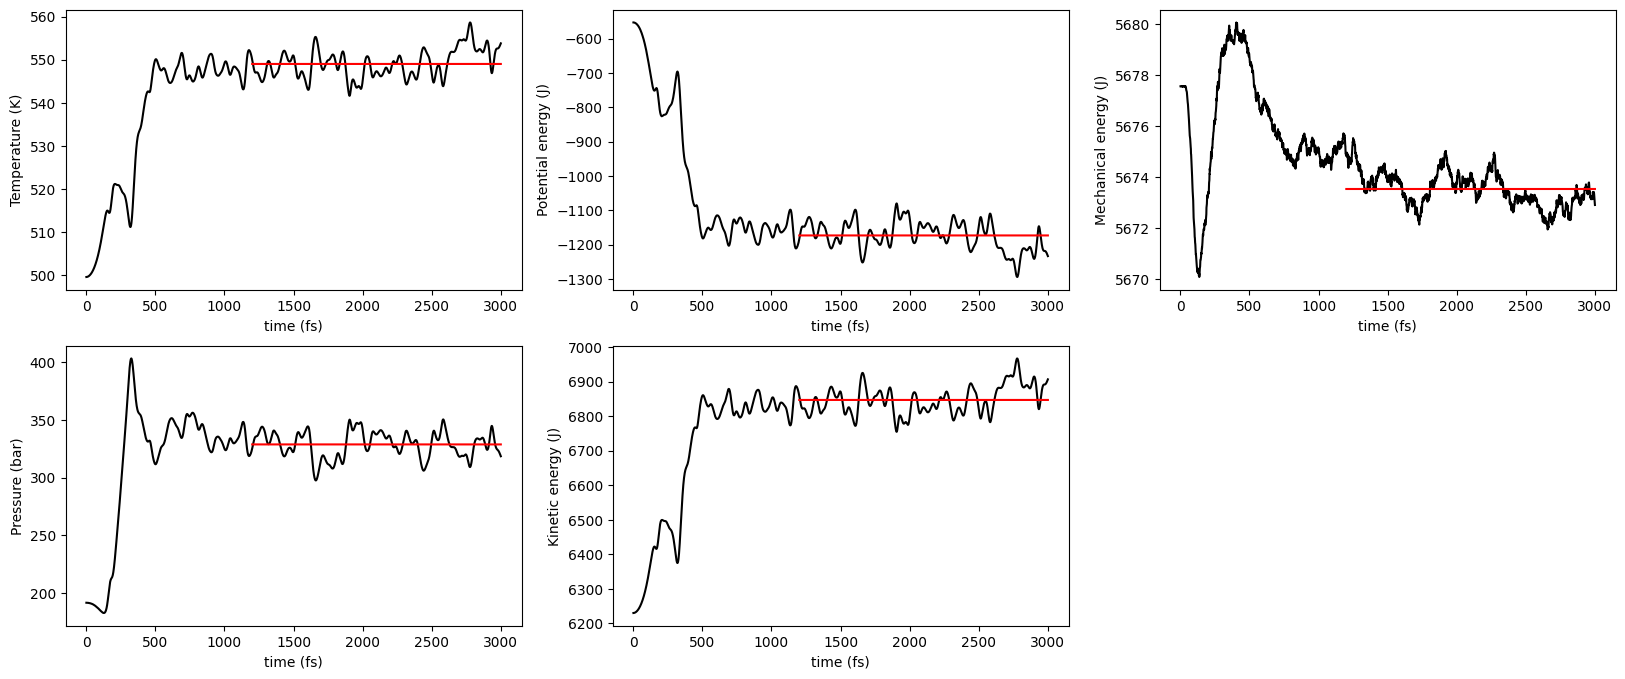

In [40]:
f = plt.figure(0, figsize=(20,8))
f.add_subplot(2,3,1)
plt.plot(t,temp,'-', color ='black')
plt.plot(t2,temp_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Temperature (K)')

f.add_subplot(2,3,2)
plt.plot(t,pot,'-', color ='black')
plt.plot(t2,pot_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Potential energy (J)')

f.add_subplot(2,3,3)
plt.plot(t,mec,'-', color ='black')
plt.plot(t2,mec_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Mechanical energy (J)')

f.add_subplot(2,3,4)
plt.plot(t,pr,'-', color ='black')
plt.plot(t2,pr_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Pressure (bar)')

f.add_subplot(2,3,5)
plt.plot(t,kin,'-', color ='black')
plt.plot(t2,kin_mean*np.ones(len(t2)),'-',color = 'red')
plt.xlabel('time (fs)')
plt.ylabel('Kinetic energy (J)')


### Calculate the heat capacities (Cv and Cp)

In [41]:
#Cv wolfram = 41.87 J/(mol K)
kb = 1.38064852E-23 #J/K
Cv = (kin_sd**2)/(kb*temp_mean**2)/1E19
Cv

40.784785203167374

In [42]:
#Cp wolfram = 54.53 J/(mol K)
NA = 6.0221409E23
Cp = kb*NA + Cv
Cp

49.09924512398384

## Using Shomate Equation to compare the Cp value

Text(0, 0.5, 'Cp (J/molK)')

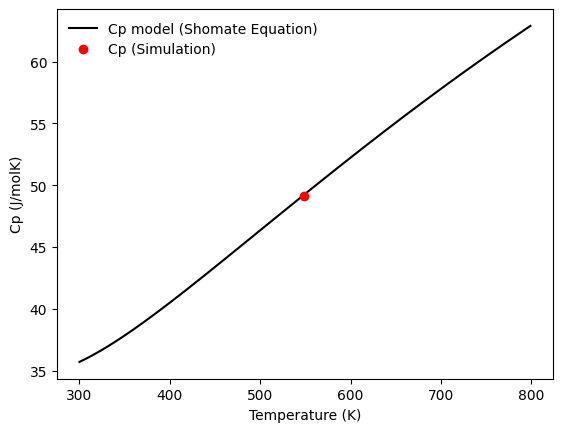

In [43]:
A = -0.703029
B = 108.4773
C = -42.52157
D = 5.862788
E = 0.678565
T = np.arange(300,800)/1000
Cp_model = A + B*T + C*T**2 + D*T**3 + E/(T**2)

plt.plot(T*1000,Cp_model,'-', color ='black', label = 'Cp model (Shomate Equation)')
plt.plot(temp_mean,Cp,'o', color ='red', label = 'Cp (Simulation)')
plt.legend(loc='best', frameon=False)
plt.xlabel('Temperature (K)')
plt.ylabel('Cp (J/molK)')

In [44]:
temp_mean = temp_mean/1000


In [45]:
Cp_model_temp_mean = Cp_model = A + B*temp_mean + C*temp_mean**2 + D*temp_mean**3 + E/(temp_mean**2)
diff = (Cp_model_temp_mean - Cp)/Cp_model_temp_mean
print(diff*100)

0.3192321677738511
